In [1]:
!pip install opencv-python
!pip install numpy
!pip install tensorflow
!pip install Pillow
!pip install matplotlib

You should consider upgrading via the 'D:\Anaconda3\envs\Segwater\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'D:\Anaconda3\envs\Segwater\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'D:\Anaconda3\envs\Segwater\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'D:\Anaconda3\envs\Segwater\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'D:\Anaconda3\envs\Segwater\python.exe -m pip install --upgrade pip' command.


In [2]:
#Rename image files
import os

def rename_images(folder_path, start_index=1):
    for root, dirs, files in os.walk(folder_path):
        for i, file in enumerate(files, start=start_index):
            old_path = os.path.join(root, file)
            extension = os.path.splitext(file)[1]
            new_name = f"image{i}{extension}"
            new_path = os.path.join(root, new_name)
            os.rename(old_path, new_path)
            print(f"Renamed {old_path} to {new_path}")

# Rename images in the Train folder
rename_images("G:\\Dataset\\Train\\with_water", start_index=1)
rename_images("G:\\Dataset\\Train\\without_water", start_index=1)

# Rename images in the Test folder
rename_images("G:\\Dataset\\Test\\with_water", start_index=1)
rename_images("G:\\Dataset\\Test\\without_water", start_index=1)


Renamed G:\Dataset\Train\with_water\240228_Spot_1.jpg to G:\Dataset\Train\with_water\image1.jpg
Renamed G:\Dataset\Train\with_water\240228_Spot_2.jpg to G:\Dataset\Train\with_water\image2.jpg
Renamed G:\Dataset\Train\with_water\240229_Spot_1.jpg to G:\Dataset\Train\with_water\image3.jpg
Renamed G:\Dataset\Train\with_water\240229_Spot_2.jpg to G:\Dataset\Train\with_water\image4.jpg
Renamed G:\Dataset\Train\with_water\240301_Spot_1.jpg to G:\Dataset\Train\with_water\image5.jpg
Renamed G:\Dataset\Train\with_water\240301_Spot_2.jpg to G:\Dataset\Train\with_water\image6.jpg
Renamed G:\Dataset\Train\with_water\240302_Spot_1.jpg to G:\Dataset\Train\with_water\image7.jpg
Renamed G:\Dataset\Train\with_water\240302_Spot_2.jpg to G:\Dataset\Train\with_water\image8.jpg
Renamed G:\Dataset\Train\with_water\240303_Spot_1.jpg to G:\Dataset\Train\with_water\image9.jpg
Renamed G:\Dataset\Train\with_water\240303_Spot_2.jpg to G:\Dataset\Train\with_water\image10.jpg
Renamed G:\Dataset\Train\with_water\240

In [2]:
import PIL.Image
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [3]:
# generators
train_ds = keras.utils.image_dataset_from_directory(
    directory = 'G:\\Dataset\\Train',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = 'G:\\Dataset\\Test',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

Found 200 files belonging to 2 classes.
Found 16 files belonging to 2 classes.


In [4]:
import os

# Get class names from the directory names
train_class_names = sorted(os.listdir('G:\\Dataset\\Train'))
validation_class_names = sorted(os.listdir('G:\\Dataset\\Test'))

print("Train Class names:", train_class_names)
print("Validation Class names:", validation_class_names)

Train Class names: ['with_water', 'without_water']
Validation Class names: ['with_water', 'without_water']


In [5]:
# Normalize
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [6]:
# Build the CNN Model
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(256, 256, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

D:\Anaconda3\envs\Segwater\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 256, 256, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 128, 128, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 128, 128, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 64, 64, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 64, 64, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 32, 32, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 131072)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      16,777,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 16,878,913 (64.39 MB)

 Trainable params: 16,878,913 (64.39 MB)

 Non-trainable params: 0 (0.00 B)

In [8]:
# Compile the Model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [9]:
# Train the Model
history = model.fit(train_ds, epochs=10, validation_data=validation_ds)

Epoch 1/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 8s 734ms/step - accuracy: 0.4735 - loss: 1.6541 - val_accuracy: 0.5000 - val_loss: 0.6943
Epoch 2/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 630ms/step - accuracy: 0.5038 - loss: 0.7091 - val_accuracy: 0.1875 - val_loss: 0.6931
Epoch 3/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 653ms/step - accuracy: 0.6329 - loss: 0.6687 - val_accuracy: 0.6250 - val_loss: 0.6777
Epoch 4/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 652ms/step - accuracy: 0.7360 - loss: 0.5809 - val_accuracy: 0.8750 - val_loss: 0.5431
Epoch 5/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 661ms/step - accuracy: 0.7789 - loss: 0.5276 - val_accuracy: 0.9375 - val_loss: 0.3535
Epoch 6/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 667ms/step - accuracy: 0.8391 - loss: 0.3860 - val_accuracy: 1.0000 - val_loss: 0.2075
Epoch 7/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 645ms/step - accuracy: 0.8678 - loss: 0.3542 - val_accuracy: 0.9375 - val_loss: 0.2289
Epoch 8/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 660ms/step - accuracy: 0.8661 - loss: 0.3612 - val_accuracy: 0.8125 - val_loss:

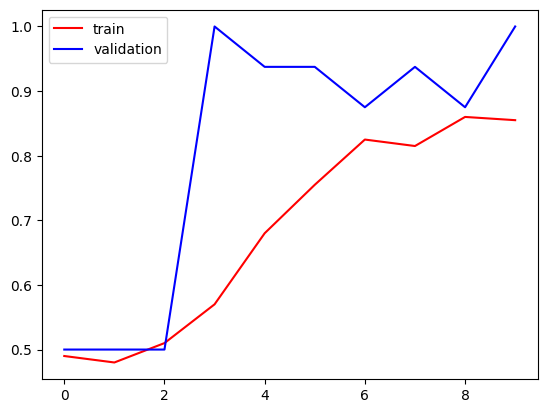

In [118]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

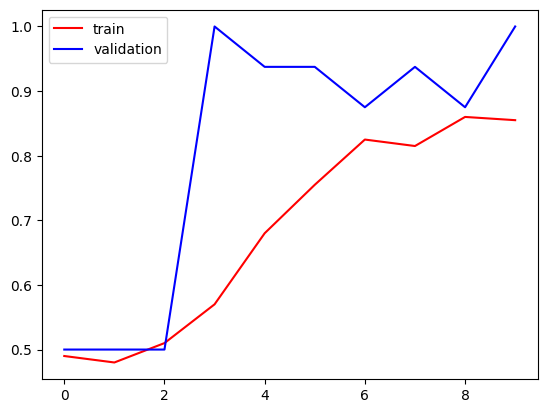

In [119]:
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

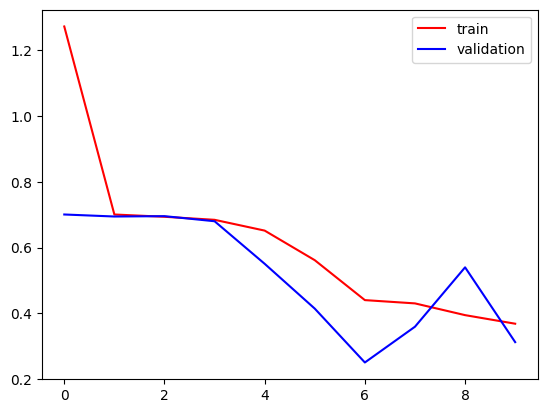

In [120]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

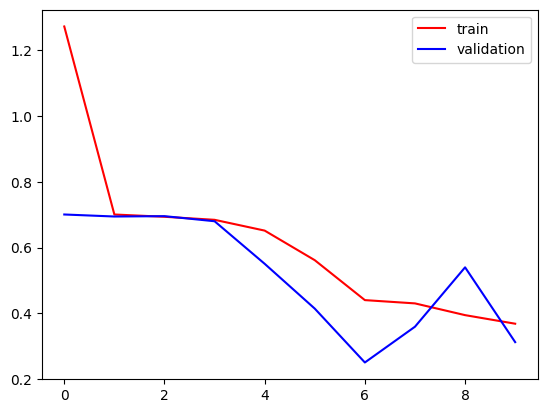

In [121]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [ ]:
# How to reduce overfitting

# Add more data
# Data Augmentation
# L1/L2 Regularizer
# Dropout
# Batch Norm

In [122]:
import cv2

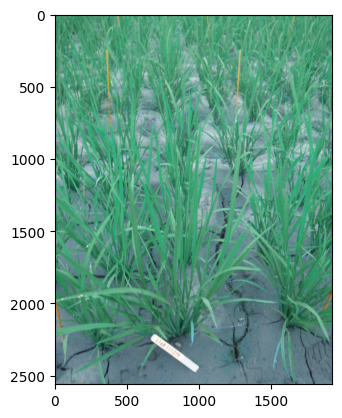

In [123]:
test_img = cv2.imread('G:\\Dataset\\Paddy1.jpg')
plt.imshow(test_img)

In [124]:
test_img.shape
test_img = cv2.resize(test_img,(256,256))
test_input = test_img.reshape((1,256,256,3))

In [125]:
model.predict(test_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step


array([[1.]], dtype=float32)

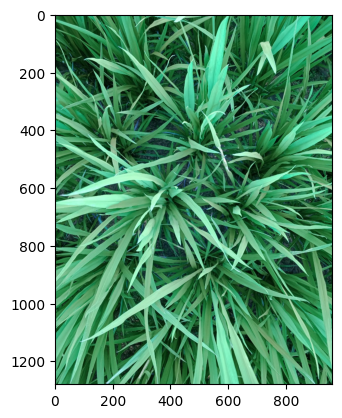

In [126]:
test_img2 = cv2.imread('G:\\Dataset\\Paddy4.jpg')
plt.imshow(test_img2)

In [127]:
test_img2.shape
test_img2 = cv2.resize(test_img2,(256,256))
test_input2 = test_img2.reshape((1,256,256,3))

In [129]:
model.predict(test_input2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


array([[1.]], dtype=float32)